In [1]:
import pandas as pd

In [2]:
all_pr_df = pd.read_parquet("AIDEV/all_pull_request.parquet")

In [3]:
all_pr_df

,id,number,title,body,agent,user_id,user,state,created_at,closed_at,merged_at,repo_id,repo_url,html_url
0,3264016139,1688,`metta code` --> `metta clip` and additional p...,Remove unused `root_key` variable to fix ruff ...,Claude_Code,37011,jacklionheart,closed,2025-07-25T18:15:36Z,2025-07-25T19:17:23Z,2025-07-25T19:17:23Z,8.439884e+08,https://api.github.com/repos/Metta-AI/metta,https://github.com/Metta-AI/metta/pull/1688
1,3264021033,41,feat: Comprehensive ruff error resolution with...,## 🎯 Mission Accomplished: 100% Ruff Error Res...,Claude_Code,131842369,Draco3310,open,2025-07-25T18:17:57Z,None,None,9.920635e+08,https://api.github.com/repos/Draco3310/Gal-Fri...,https://github.com/Draco3310/Gal-Friday2/pull/41
2,3264042289,1600,Add Evals frontend implementation plan and HTM...,\nCreate comprehensive implementation plan for...,Claude_Code,6766889,justicart,closed,2025-07-25T18:26:15Z,2025-07-25T23:19:14Z,None,9.267118e+08,https://api.github.com/repos/bolt-foundry/bolt...,https://github.com/bolt-foundry/bolt-foundry/p...
3,3264042318,1601,Add 4 new BfDs components for Evals interface ...,\nPhase 1 component creation for the Evals fro...,Claude_Code,6766889,justicart,closed,2025-07-25T18:26:16Z,2025-07-25T23:19:11Z,None,9.267118e+08,https://api.github.com/repos/bolt-foundry/bolt...,https://github.com/bolt-foundry/bolt-foundry/p...
4,3264067496,3,🚀 Complete Frontend-Backend API Integration wi...,## 🎯 Summary\n\nThis PR completes the **fronte...,Claude_Code,42357482,twitchyvr,closed,2025-07-25T18:39:14Z,2025-07-25T18:48:47Z,2025-07-25T18:48:47Z,1.025871e+09,https://api.github.com/repos/twitchyvr/Spaghetti,https://github.com/twitchyvr/Spaghetti/pull/3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
932786,2858495710,79,chore: update RPC endpoint and build target,# Update RPC Endpoint and Build Target\n\nUpda...,Devin,158243242,devin-ai-integration[bot],closed,2025-02-17T17:53:32Z,2025-02-17T17:54:19Z,2025-02-17T17:54:19Z,9.274854e+08,https://api.github.com/repos/xiayuhkust/TuraWAP,https://github.com/xiayuhkust/TuraWAP/pull/79
932787,2858498986,6,feat: enhance recruitment management system wi...,# Enhanced Recruitment Management System\n\nTh...,Devin,158243242,devin-ai-integration[bot],closed,2025-02-17T17:55:34Z,2025-02-18T02:19:26Z,2025-02-18T02:19:26Z,9.334548e+08,https://api.github.com/repos/crb12546/musical-...,https://github.com/crb12546/musical-memory/pull/6
932788,2858525953,80,fix: revert to PR #73 OpenAI config with updat...,# Revert to PR #73 with Updated RPC Endpoint\n...,Devin,158243242,devin-ai-integration[bot],closed,2025-02-17T18:10:27Z,2025-02-17T18:13:05Z,2025-02-17T18:13:05Z,9.274854e+08,https://api.github.com/repos/xiayuhkust/TuraWAP,https://github.com/xiayuhkust/TuraWAP/pull/80
932789,2858527610,400,Add Doxygen Documentation for Public APIs,# Add Doxygen Documentation for Public APIs\n\...,Devin,158243242,devin-ai-integration[bot],closed,2025-02-17T18:11:27Z,2025-02-22T01:15:27Z,None,1.195796e+08,https://api.github.com/repos/wolfSSL/wolfTPM,https://github.com/wolfSSL/wolfTPM/pull/400


In [4]:
created_at_range = pd.to_datetime(all_pr_df['created_at']).agg(['min', 'max']).rename({'min': 'start', 'max': 'end'})
created_at_range.to_frame().T

,start,end
created_at,2024-12-24 00:23:09+00:00,2025-07-30 19:50:49+00:00


In [5]:
all_pr_df['agent'].value_counts()

agent
OpenAI_Codex    814522
Copilot          50447
Cursor           32941
Devin            29744
Claude_Code       5137
Name: count, dtype: int64

In [6]:
agent_created_at_range = (
    all_pr_df.assign(created_at=pd.to_datetime(all_pr_df["created_at"], utc=True))
            .loc[lambda df_: df_["agent"].isin(["OpenAI_Codex", "Copilot", "Cursor", "Devin", "Claude_Code"])]
            .groupby("agent")["created_at"]
            .agg(earliest_created_at="min", latest_created_at="max")
)
agent_created_at_range

,earliest_created_at,latest_created_at
agent,,
Claude_Code,2025-02-24 19:52:57+00:00,2025-07-30 19:39:22+00:00
Copilot,2025-03-13 19:27:28+00:00,2025-07-30 13:09:06+00:00
Cursor,2025-01-06 19:37:02+00:00,2025-07-30 09:00:20+00:00
Devin,2024-12-24 00:23:09+00:00,2025-07-30 19:25:58+00:00
OpenAI_Codex,2025-05-16 16:03:15+00:00,2025-07-30 19:50:49+00:00


In [7]:
all_pr_df

,id,number,title,body,agent,user_id,user,state,created_at,closed_at,merged_at,repo_id,repo_url,html_url
0,3264016139,1688,`metta code` --> `metta clip` and additional p...,Remove unused `root_key` variable to fix ruff ...,Claude_Code,37011,jacklionheart,closed,2025-07-25T18:15:36Z,2025-07-25T19:17:23Z,2025-07-25T19:17:23Z,8.439884e+08,https://api.github.com/repos/Metta-AI/metta,https://github.com/Metta-AI/metta/pull/1688
1,3264021033,41,feat: Comprehensive ruff error resolution with...,## 🎯 Mission Accomplished: 100% Ruff Error Res...,Claude_Code,131842369,Draco3310,open,2025-07-25T18:17:57Z,None,None,9.920635e+08,https://api.github.com/repos/Draco3310/Gal-Fri...,https://github.com/Draco3310/Gal-Friday2/pull/41
2,3264042289,1600,Add Evals frontend implementation plan and HTM...,\nCreate comprehensive implementation plan for...,Claude_Code,6766889,justicart,closed,2025-07-25T18:26:15Z,2025-07-25T23:19:14Z,None,9.267118e+08,https://api.github.com/repos/bolt-foundry/bolt...,https://github.com/bolt-foundry/bolt-foundry/p...
3,3264042318,1601,Add 4 new BfDs components for Evals interface ...,\nPhase 1 component creation for the Evals fro...,Claude_Code,6766889,justicart,closed,2025-07-25T18:26:16Z,2025-07-25T23:19:11Z,None,9.267118e+08,https://api.github.com/repos/bolt-foundry/bolt...,https://github.com/bolt-foundry/bolt-foundry/p...
4,3264067496,3,🚀 Complete Frontend-Backend API Integration wi...,## 🎯 Summary\n\nThis PR completes the **fronte...,Claude_Code,42357482,twitchyvr,closed,2025-07-25T18:39:14Z,2025-07-25T18:48:47Z,2025-07-25T18:48:47Z,1.025871e+09,https://api.github.com/repos/twitchyvr/Spaghetti,https://github.com/twitchyvr/Spaghetti/pull/3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
932786,2858495710,79,chore: update RPC endpoint and build target,# Update RPC Endpoint and Build Target\n\nUpda...,Devin,158243242,devin-ai-integration[bot],closed,2025-02-17T17:53:32Z,2025-02-17T17:54:19Z,2025-02-17T17:54:19Z,9.274854e+08,https://api.github.com/repos/xiayuhkust/TuraWAP,https://github.com/xiayuhkust/TuraWAP/pull/79
932787,2858498986,6,feat: enhance recruitment management system wi...,# Enhanced Recruitment Management System\n\nTh...,Devin,158243242,devin-ai-integration[bot],closed,2025-02-17T17:55:34Z,2025-02-18T02:19:26Z,2025-02-18T02:19:26Z,9.334548e+08,https://api.github.com/repos/crb12546/musical-...,https://github.com/crb12546/musical-memory/pull/6
932788,2858525953,80,fix: revert to PR #73 OpenAI config with updat...,# Revert to PR #73 with Updated RPC Endpoint\n...,Devin,158243242,devin-ai-integration[bot],closed,2025-02-17T18:10:27Z,2025-02-17T18:13:05Z,2025-02-17T18:13:05Z,9.274854e+08,https://api.github.com/repos/xiayuhkust/TuraWAP,https://github.com/xiayuhkust/TuraWAP/pull/80
932789,2858527610,400,Add Doxygen Documentation for Public APIs,# Add Doxygen Documentation for Public APIs\n\...,Devin,158243242,devin-ai-integration[bot],closed,2025-02-17T18:11:27Z,2025-02-22T01:15:27Z,None,1.195796e+08,https://api.github.com/repos/wolfSSL/wolfTPM,https://github.com/wolfSSL/wolfTPM/pull/400


---

### Devin

In [8]:
all_pr_devin = all_pr_df[all_pr_df['agent'] == 'Devin']

In [9]:
all_pr_devin

,id,number,title,body,agent,user_id,user,state,created_at,closed_at,merged_at,repo_id,repo_url,html_url
903047,3277367174,3243,Fix #3242: Add reasoning parameter to LLM clas...,# Fix #3242: Add reasoning parameter to LLM cl...,Devin,158243242,devin-ai-integration[bot],open,2025-07-30T14:39:48Z,None,None,7.106011e+08,https://api.github.com/repos/crewAIInc/crewAI,https://github.com/crewAIInc/crewAI/pull/3243
903048,3277422683,3730,docs: highlight Neon Local Connect option on c...,# docs: highlight Neon Local Connect option on...,Devin,158243242,devin-ai-integration[bot],open,2025-07-30T14:52:10Z,None,None,3.524361e+08,https://api.github.com/repos/neondatabase/website,https://github.com/neondatabase/website/pull/3730
903049,3277429161,1895,feat(crawler): replace robotstxt library with ...,# feat(crawler): replace robotstxt library wit...,Devin,158243242,devin-ai-integration[bot],open,2025-07-30T14:53:47Z,None,None,7.870764e+08,https://api.github.com/repos/mendableai/firecrawl,https://github.com/mendableai/firecrawl/pull/1895
903050,3277452738,2557,Add documentation for resolveUsers 50-user bat...,# Add documentation for resolveUsers 50-user b...,Devin,158243242,devin-ai-integration[bot],closed,2025-07-30T15:00:13Z,2025-07-30T18:15:17Z,2025-07-30T18:15:17Z,3.707408e+08,https://api.github.com/repos/liveblocks/livebl...,https://github.com/liveblocks/liveblocks/pull/...
903051,3277468741,3,Focus Playwright test suite on webkit and mobi...,# Focus Playwright test suite on webkit and mo...,Devin,158243242,devin-ai-integration[bot],closed,2025-07-30T15:04:43Z,2025-07-30T15:07:07Z,2025-07-30T15:07:07Z,1.023005e+09,https://api.github.com/repos/joeycmlam/persona...,https://github.com/joeycmlam/personal-finance-...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
932786,2858495710,79,chore: update RPC endpoint and build target,# Update RPC Endpoint and Build Target\n\nUpda...,Devin,158243242,devin-ai-integration[bot],closed,2025-02-17T17:53:32Z,2025-02-17T17:54:19Z,2025-02-17T17:54:19Z,9.274854e+08,https://api.github.com/repos/xiayuhkust/TuraWAP,https://github.com/xiayuhkust/TuraWAP/pull/79
932787,2858498986,6,feat: enhance recruitment management system wi...,# Enhanced Recruitment Management System\n\nTh...,Devin,158243242,devin-ai-integration[bot],closed,2025-02-17T17:55:34Z,2025-02-18T02:19:26Z,2025-02-18T02:19:26Z,9.334548e+08,https://api.github.com/repos/crb12546/musical-...,https://github.com/crb12546/musical-memory/pull/6
932788,2858525953,80,fix: revert to PR #73 OpenAI config with updat...,# Revert to PR #73 with Updated RPC Endpoint\n...,Devin,158243242,devin-ai-integration[bot],closed,2025-02-17T18:10:27Z,2025-02-17T18:13:05Z,2025-02-17T18:13:05Z,9.274854e+08,https://api.github.com/repos/xiayuhkust/TuraWAP,https://github.com/xiayuhkust/TuraWAP/pull/80
932789,2858527610,400,Add Doxygen Documentation for Public APIs,# Add Doxygen Documentation for Public APIs\n\...,Devin,158243242,devin-ai-integration[bot],closed,2025-02-17T18:11:27Z,2025-02-22T01:15:27Z,None,1.195796e+08,https://api.github.com/repos/wolfSSL/wolfTPM,https://github.com/wolfSSL/wolfTPM/pull/400


In [10]:
all_pr_devin_closed = all_pr_devin[all_pr_devin['state'] == 'closed']

In [11]:
all_pr_devin_closed_timesorted = all_pr_devin_closed.sort_values(by='created_at', ascending=True)

In [12]:
all_pr_devin_closed_timesorted

,id,number,title,body,agent,user_id,user,state,created_at,closed_at,merged_at,repo_id,repo_url,html_url
931058,2756921963,603,Add LLM Integration Tests,# 🔍 Review Summary \n **Purpose**:\n- Enhance ...,Devin,158243242,devin-ai-integration[bot],closed,2024-12-24T00:23:09Z,2025-01-09T11:13:02Z,None,6.790175e+08,https://api.github.com/repos/AgentOps-AI/agentops,https://github.com/AgentOps-AI/agentops/pull/603
931059,2756955247,139,feat: implement DNS query checking upon archiv...,# DNS Query Checking Upon Archive Get\n\nFixes...,Devin,158243242,devin-ai-integration[bot],closed,2024-12-24T00:57:04Z,2025-01-23T18:39:40Z,None,7.251302e+08,https://api.github.com/repos/zkemail/archive.z...,https://github.com/zkemail/archive.zk.email/pu...
931060,2757008868,8,fix: remove duplicate DHCP and DNS assignment ...,# DNS and DHCP Functionality Migration from se...,Devin,158243242,devin-ai-integration[bot],closed,2024-12-24T01:42:40Z,2024-12-24T01:50:22Z,2024-12-24T01:50:22Z,7.382892e+08,https://api.github.com/repos/flyby-yunakayama/...,https://github.com/flyby-yunakayama/network-si...
931061,2757009257,6,fix: add CORS headers for Netlify Identity ser...,Fix CORS Issues with Netlify Identity Service\...,Devin,158243242,devin-ai-integration[bot],closed,2024-12-24T01:43:19Z,2024-12-24T01:46:49Z,2024-12-24T01:46:48Z,7.985457e+08,https://api.github.com/repos/BijanJohn/bijan-j...,https://github.com/BijanJohn/bijan-john-websit...
931062,2757012201,9,refactor: remove DHCPPacket.to_bytes to unify ...,# Remove DHCPPacket.to_bytes method\n\nThis ch...,Devin,158243242,devin-ai-integration[bot],closed,2024-12-24T01:48:08Z,2024-12-24T01:50:36Z,2024-12-24T01:50:36Z,7.382892e+08,https://api.github.com/repos/flyby-yunakayama/...,https://github.com/flyby-yunakayama/network-si...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
903080,3277906094,1,Implement GitHub Issues Devin Integration System,# Implement GitHub Issues Devin Integration Sy...,Devin,158243242,devin-ai-integration[bot],closed,2025-07-30T17:27:52Z,2025-07-30T17:28:09Z,2025-07-30T17:28:09Z,1.028509e+09,https://api.github.com/repos/nrkfeller/nick-de...,https://github.com/nrkfeller/nick-devin-demo/p...
903083,3277978133,12,Implement complete Better Auth authentication ...,# Implement complete Better Auth authenticatio...,Devin,158243242,devin-ai-integration[bot],closed,2025-07-30T17:50:54Z,2025-07-30T17:58:36Z,None,1.026112e+09,https://api.github.com/repos/sujatagunale/nike,https://github.com/sujatagunale/nike/pull/12
903096,3278202829,49,feat: remember last visited board in localStor...,# feat: remember last visited board in localSt...,Devin,158243242,devin-ai-integration[bot],closed,2025-07-30T19:21:36Z,2025-07-30T19:22:48Z,2025-07-30T19:22:48Z,1.028436e+09,https://api.github.com/repos/antiwork/gumboard,https://github.com/antiwork/gumboard/pull/49
903099,3278209071,51,Fix empty Slack notifications and add debounce...,# Fix empty Slack notifications and add deboun...,Devin,158243242,devin-ai-integration[bot],closed,2025-07-30T19:24:15Z,2025-07-30T19:27:56Z,2025-07-30T19:27:56Z,1.028436e+09,https://api.github.com/repos/antiwork/gumboard,https://github.com/antiwork/gumboard/pull/51


In [13]:
devin_with_month = (
    all_pr_devin_closed_timesorted.assign(
        created_at_dt=pd.to_datetime(all_pr_devin_closed_timesorted["created_at"], utc=True)
    )
    .assign(created_month=lambda df_: df_["created_at_dt"].dt.to_period("M"))
)

/var/folders/kf/9dhrf2c10hqcgvm080qlhzvw0000gn/T/ipykernel_13955/1269465332.py:5: UserWarning: Converting to PeriodArray/Index representation will drop timezone information.
  .assign(created_month=lambda df_: df_["created_at_dt"].dt.to_period("M"))


In [14]:
devin_monthly_subframes = {
    month.strftime("%b %Y"): devin_with_month.loc[devin_with_month["created_month"] == month].copy()
    for month in devin_with_month["created_month"].drop_duplicates().sort_values()
}

In [15]:
devin_monthly_subframes['Jan 2025']

,id,number,title,body,agent,user_id,user,state,created_at,closed_at,merged_at,repo_id,repo_url,html_url,created_at_dt,created_month
913847,2764753419,175,Fix macOS CI by installing Python 3.12 using uv,Fix macOS CI by installing Python 3.12 using u...,Devin,158243242,devin-ai-integration[bot],closed,2025-01-01T00:45:26Z,2025-01-01T01:59:38Z,2025-01-01T01:59:37Z,737157731.0,https://api.github.com/repos/higumachan/flexim,https://github.com/higumachan/flexim/pull/175,2025-01-01 00:45:26+00:00,2025-01
913848,2764754732,9,feat: add mean time to inclusion tracking in s...,# Add mean time to inclusion tracking in SWQoS...,Devin,158243242,devin-ai-integration[bot],closed,2025-01-01T00:49:12Z,2025-01-01T01:04:19Z,2025-01-01T01:04:19Z,835337077.0,https://api.github.com/repos/solayer-labs/sola...,https://github.com/solayer-labs/solayer-cli/pu...,2025-01-01 00:49:12+00:00,2025-01
913849,2764760075,1,Update Navigation Bar and Add Deployment Instr...,# Update Navigation Bar and Add Deployment Ins...,Devin,158243242,devin-ai-integration[bot],closed,2025-01-01T01:03:33Z,2025-01-23T17:09:58Z,None,910637415.0,https://api.github.com/repos/bparanj/aiviz,https://github.com/bparanj/aiviz/pull/1,2025-01-01 01:03:33+00:00,2025-01
913850,2764764986,9,fix: add null checks for DOM elements in like-...,## Changes\n- Added null checks for resetButto...,Devin,158243242,devin-ai-integration[bot],closed,2025-01-01T01:16:46Z,2025-01-01T01:18:02Z,2025-01-01T01:18:02Z,910592385.0,https://api.github.com/repos/Shubhamkharage7/c...,https://github.com/Shubhamkharage7/community-o...,2025-01-01 01:16:46+00:00,2025-01
913851,2764765168,11,"feat: add CI workflow with clippy, fmt, and te...","Add CI workflow with clippy, fmt, and test che...",Devin,158243242,devin-ai-integration[bot],closed,2025-01-01T01:17:14Z,2025-01-01T02:06:48Z,None,729951631.0,https://api.github.com/repos/higumachan/cargo-...,https://github.com/higumachan/cargo-cleaner/pu...,2025-01-01 01:17:14+00:00,2025-01
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
917663,2824282372,2318,chore: init KeeperMetrics with chain_id and pr...,Initialize KeeperMetrics with chain_ids and pr...,Devin,158243242,devin-ai-integration[bot],closed,2025-01-31T19:52:19Z,2025-01-31T22:00:11Z,2025-01-31T22:00:11Z,425803244.0,https://api.github.com/repos/pyth-network/pyth...,https://github.com/pyth-network/pyth-crosschai...,2025-01-31 19:52:19+00:00,2025-01
917664,2824328502,52697,connectors: Add pendulum as explicit dependenc...,# Add Pendulum as explicit dependency to multi...,Devin,158243242,devin-ai-integration[bot],closed,2025-01-31T20:17:58Z,2025-02-09T15:23:04Z,None,283046497.0,https://api.github.com/repos/airbytehq/airbyte,https://github.com/airbytehq/airbyte/pull/52697,2025-01-31 20:17:58+00:00,2025-01
917665,2824360133,52698,docs: remove redundant content from connector'...,This PR removes redundant content from connect...,Devin,158243242,devin-ai-integration[bot],closed,2025-01-31T20:41:19Z,2025-02-09T15:23:04Z,None,283046497.0,https://api.github.com/repos/airbytehq/airbyte,https://github.com/airbytehq/airbyte/pull/52698,2025-01-31 20:41:19+00:00,2025-01
917666,2824427819,1190,Add i18n for the Pricing Page,# Add i18n for the Pricing Page\n\nThis PR add...,Devin,158243242,devin-ai-integration[bot],closed,2025-01-31T21:29:24Z,2025-02-04T08:59:35Z,2025-02-04T08:59:35Z,820087727.0,https://api.github.com/repos/onlook-dev/onlook,https://github.com/onlook-dev/onlook/pull/1190,2025-01-31 21:29:24+00:00,2025-01


In [16]:
devin_months = ['Dec 2024', 'Jan 2025', 'Feb 2025', 'Mar 2025', 'Apr 2025', 'May 2025', 'Jun 2025', 'Jul 2025']
claude_months = ['Feb 2025', 'Mar 2025', 'Apr 2025', 'May 2025', 'Jun 2025', 'Jul 2025']
cursor_months = ['Jan 2025', 'Feb 2025', 'Mar 2025', 'Apr 2025', 'May 2025', 'Jun 2025', 'Jul 2025']


In [17]:
dec_prs = devin_monthly_subframes['Dec 2024']
dec_closed_count = dec_prs['closed_at'].notna().sum()
dec_merged_count = dec_prs['merged_at'].notna().sum()
dec_merge_rate = dec_merged_count / dec_closed_count if dec_closed_count else float("nan")

In [18]:
dec_merge_rate

np.float64(0.5763636363636364)

In [19]:
devin_merge_rate = []

for month in devin_months:
    prs = devin_monthly_subframes[f'{month}']
    closed_count = prs['closed_at'].notna().sum()
    merged_count = prs['merged_at'].notna().sum()
    merge_rate = merged_count / closed_count if closed_count else float("nan")
    
    devin_merge_rate.append(merge_rate)


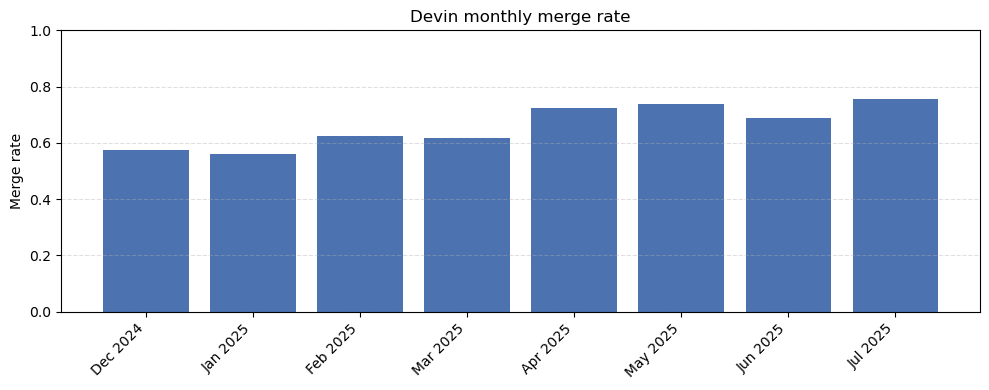

In [20]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 4))
plt.bar(devin_months, devin_merge_rate, color="#4C72B0")
plt.ylabel("Merge rate")
plt.title("Devin monthly merge rate")
plt.ylim(0, 1)
plt.xticks(rotation=45, ha="right")
plt.grid(axis="y", linestyle="--", alpha=0.4)
plt.tight_layout()
plt.show()

In [21]:
claude_months = ['Feb 2025', 'Mar 2025', 'Apr 2025', 'May 2025', 'Jun 2025', 'Jul 2025']
cursor_months = ['Jan 2025', 'Feb 2025', 'Mar 2025', 'Apr 2025', 'May 2025', 'Jun 2025', 'Jul 2025']

---

### Claude

In [22]:
all_pr_claude = all_pr_df[all_pr_df['agent'] == 'Claude_Code']

In [23]:
all_pr_claude_closed = all_pr_claude[all_pr_claude['state'] == 'closed']

In [24]:
all_pr_claude_closed_timesorted = all_pr_claude_closed.sort_values(by='created_at', ascending=True)

In [25]:
claude_with_month = (
    all_pr_claude_closed_timesorted.assign(
        created_at_dt=pd.to_datetime(all_pr_claude_closed_timesorted["created_at"], utc=True)
    )
    .assign(created_month=lambda df_: df_["created_at_dt"].dt.to_period("M"))
)

/var/folders/kf/9dhrf2c10hqcgvm080qlhzvw0000gn/T/ipykernel_13955/2065218095.py:5: UserWarning: Converting to PeriodArray/Index representation will drop timezone information.
  .assign(created_month=lambda df_: df_["created_at_dt"].dt.to_period("M"))


In [26]:
claude_monthly_subframes = {
    month.strftime("%b %Y"): claude_with_month.loc[claude_with_month["created_month"] == month].copy()
    for month in claude_with_month["created_month"].drop_duplicates().sort_values()
}

In [27]:
claude_merge_rate = []

for month in claude_months:
    prs = claude_monthly_subframes[f'{month}']
    closed_count = prs['closed_at'].notna().sum()
    merged_count = prs['merged_at'].notna().sum()
    merge_rate = merged_count / closed_count if closed_count else float("nan")
    
    claude_merge_rate.append(merge_rate)


In [28]:
claude_merge_rate

[np.float64(0.8461538461538461),
 np.float64(0.806060606060606),
 np.float64(0.9117647058823529),
 np.float64(0.7324675324675325),
 np.float64(0.845993031358885),
 np.float64(0.8415545590433483)]

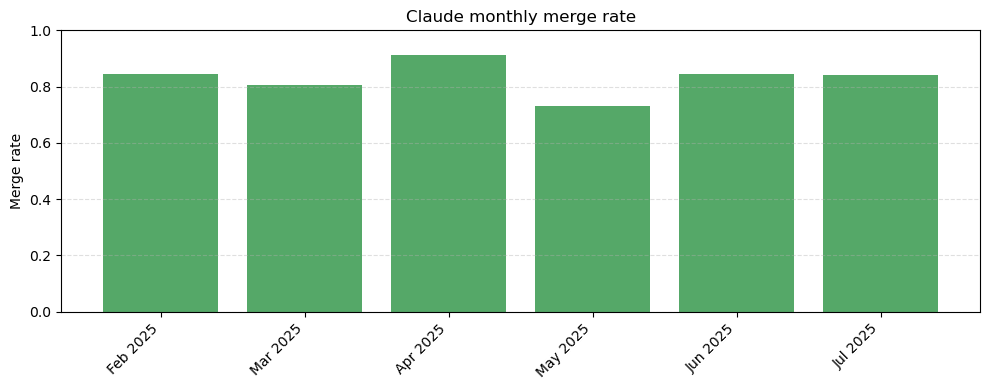

In [29]:
plt.figure(figsize=(10, 4))
plt.bar(claude_months, claude_merge_rate, color="#55A868")
plt.ylabel("Merge rate")
plt.title("Claude monthly merge rate")
plt.ylim(0, 1)
plt.xticks(rotation=45, ha="right")
plt.grid(axis="y", linestyle="--", alpha=0.4)
plt.tight_layout()
plt.show()

---

### Cursor

In [30]:
all_pr_cursor = all_pr_df[all_pr_df['agent'] == 'Cursor']

In [31]:
all_pr_cursor_closed = all_pr_cursor[all_pr_cursor['state'] == 'closed']

In [32]:
all_pr_cursor_closed_timesorted = all_pr_cursor_closed.sort_values(by='created_at', ascending=True)

In [33]:
cursor_with_month = (
    all_pr_cursor_closed_timesorted.assign(
        created_at_dt=pd.to_datetime(all_pr_cursor_closed_timesorted["created_at"], utc=True)
    )
    .assign(created_month=lambda df_: df_["created_at_dt"].dt.to_period("M"))
)

/var/folders/kf/9dhrf2c10hqcgvm080qlhzvw0000gn/T/ipykernel_13955/234465223.py:5: UserWarning: Converting to PeriodArray/Index representation will drop timezone information.
  .assign(created_month=lambda df_: df_["created_at_dt"].dt.to_period("M"))


In [34]:
cursor_monthly_subframes = {
    month.strftime("%b %Y"): cursor_with_month.loc[cursor_with_month["created_month"] == month].copy()
    for month in cursor_with_month["created_month"].drop_duplicates().sort_values()
}

In [35]:
cursor_merge_rate = []

for month in cursor_months:
    prs = cursor_monthly_subframes[f'{month}']
    closed_count = prs['closed_at'].notna().sum()
    merged_count = prs['merged_at'].notna().sum()
    merge_rate = merged_count / closed_count if closed_count else float("nan")
    
    cursor_merge_rate.append(merge_rate)

In [36]:
cursor_merge_rate

[np.float64(1.0),
 np.float64(0.8),
 np.float64(0.8571428571428571),
 np.float64(1.0),
 np.float64(0.8521739130434782),
 np.float64(0.850735294117647),
 np.float64(0.903326674194389)]

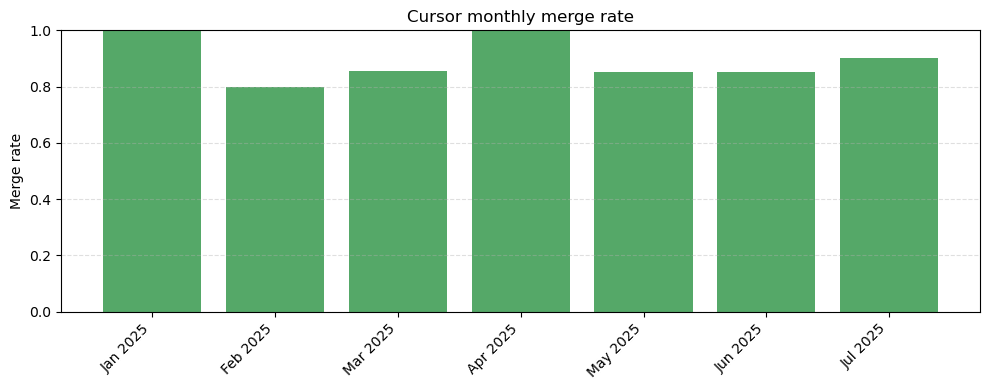

In [37]:
plt.figure(figsize=(10, 4))
plt.bar(cursor_months, cursor_merge_rate, color="#55A868")
plt.ylabel("Merge rate")
plt.title("Cursor monthly merge rate")
plt.ylim(0, 1)
plt.xticks(rotation=45, ha="right")
plt.grid(axis="y", linestyle="--", alpha=0.4)
plt.tight_layout()

---

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming df has columns: ['agent', 'category', 'merged', 'closed', 'mean_resolution_time']

# Compute success rate
df['success_rate'] = df['merged'] / df['closed']

# Normalize resolution time per category (smaller = better)
df['efficiency'] = df.groupby('category')['mean_resolution_time'].transform(
    lambda x: 1 - (x - x.min()) / (x.max() - x.min() + 1e-9)
)

# Compute composite Agent Performance Index (API)
df['API'] = 0.7 * df['success_rate'] + 0.3 * df['efficiency']

# Filter for OpenAICodex and Claude
subset = df[df['agent'].isin(['OpenAICodex', 'Claude'])]

# Rank agents overall and category-wise
overall_rank = subset.groupby('agent')['API'].mean().sort_values(ascending=False)
category_rank = subset.groupby(['category', 'agent'])['API'].mean().reset_index()

# --- Visualization ---
# Overall bar chart
plt.figure(figsize=(6, 4))
sns.barplot(x=overall_rank.index, y=overall_rank.values, palette='viridis')
plt.title('Overall Agent Performance Index (Dec 2024–Jul 2025)')
plt.ylabel('Average API Score')
plt.xlabel('Agent')
plt.show()

# Category-wise barplot
plt.figure(figsize=(10, 6))
sns.barplot(data=category_rank, x='category', y='API', hue='agent', palette='coolwarm')
plt.title('Category-wise Agent Performance (API)')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

# Optionally, print rankings
print("Overall Ranking:\n", overall_rank)
print("\nCategory-wise Mean API:\n", category_rank.pivot(index='category', columns='agent', values='API'))